## Python memory Management

Memory management in Python involves a combination of automatic garbage collection, reference counting,
and Various internal organization to efficiently manage memory allocation and deallocation.Understanding these mechanisms can help developers write more efficient and robust applications.

1. Key Concepts in Python Memory Management

2. Memory Allocation and Deallocation

3. Reference Counting

4. Garbage collection

5. The gc Module

6. Memory management best practices

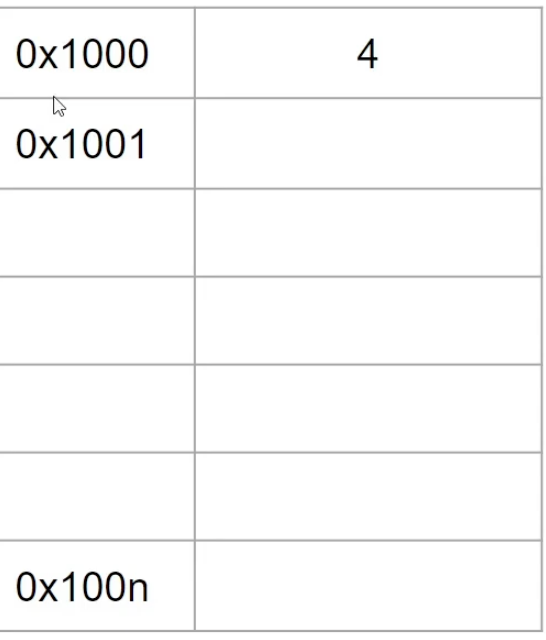

hexadecimal address and value (in register)

In [15]:
## i create variable a=2

a=4 ## python called variable as "name"

print(id(a))
print(id(4))
print(hex(id(a)))
## this is called as "call by object reference "
## everything in python is an object

4347387904
4347387904
0x1031fe000


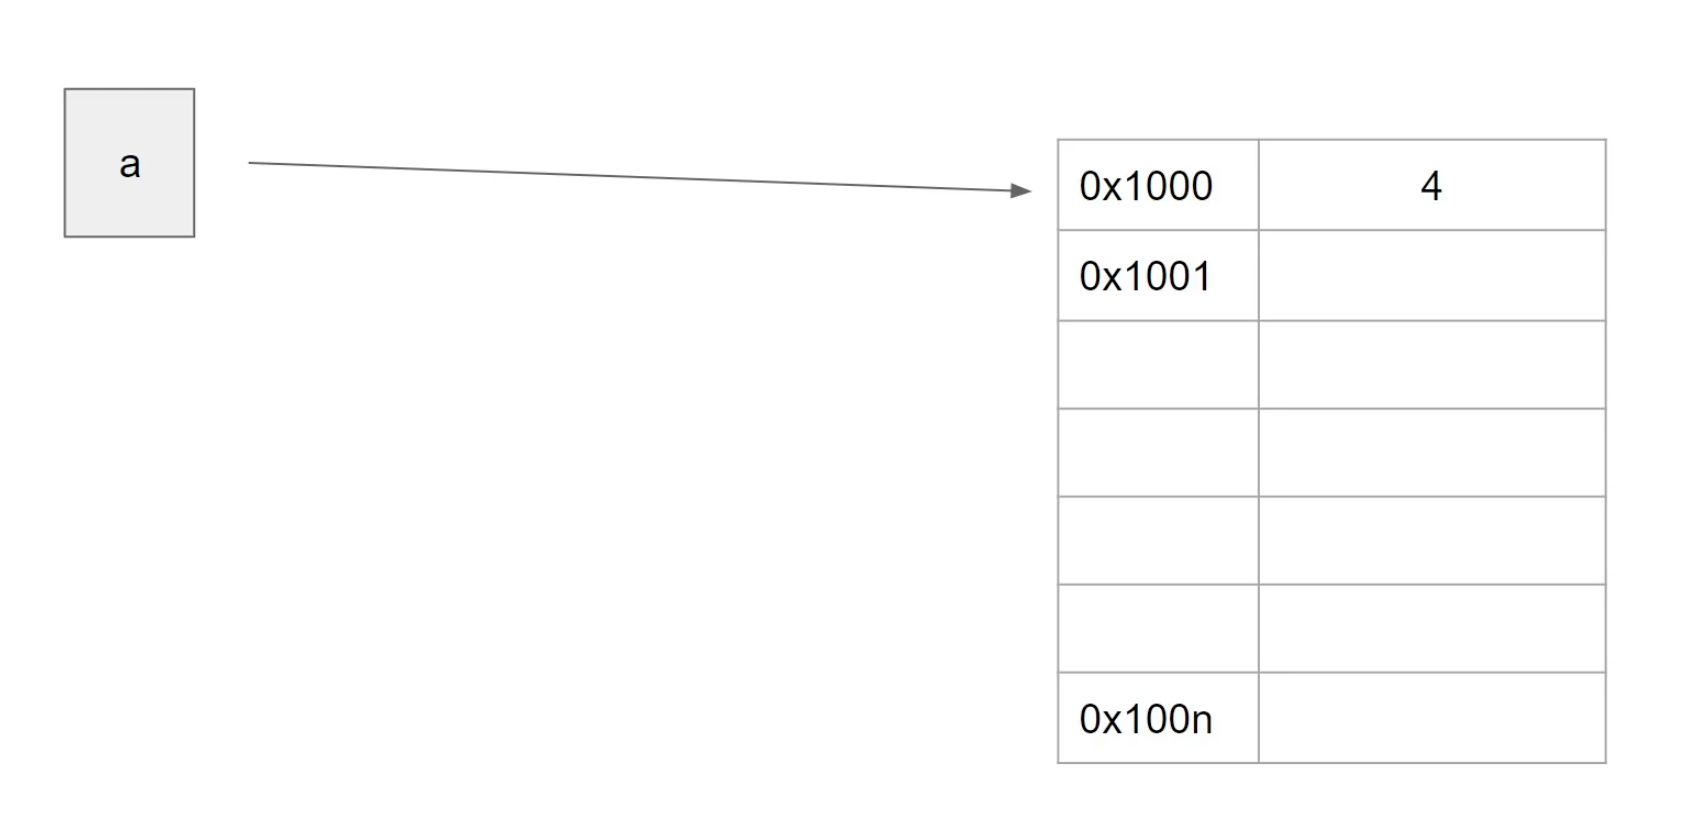

## Aliasing 


In [25]:
a=5
b=a ##aliasing

In [17]:
id(a)

4347387936

In [18]:
id(b)

## id will be same 

4347387936

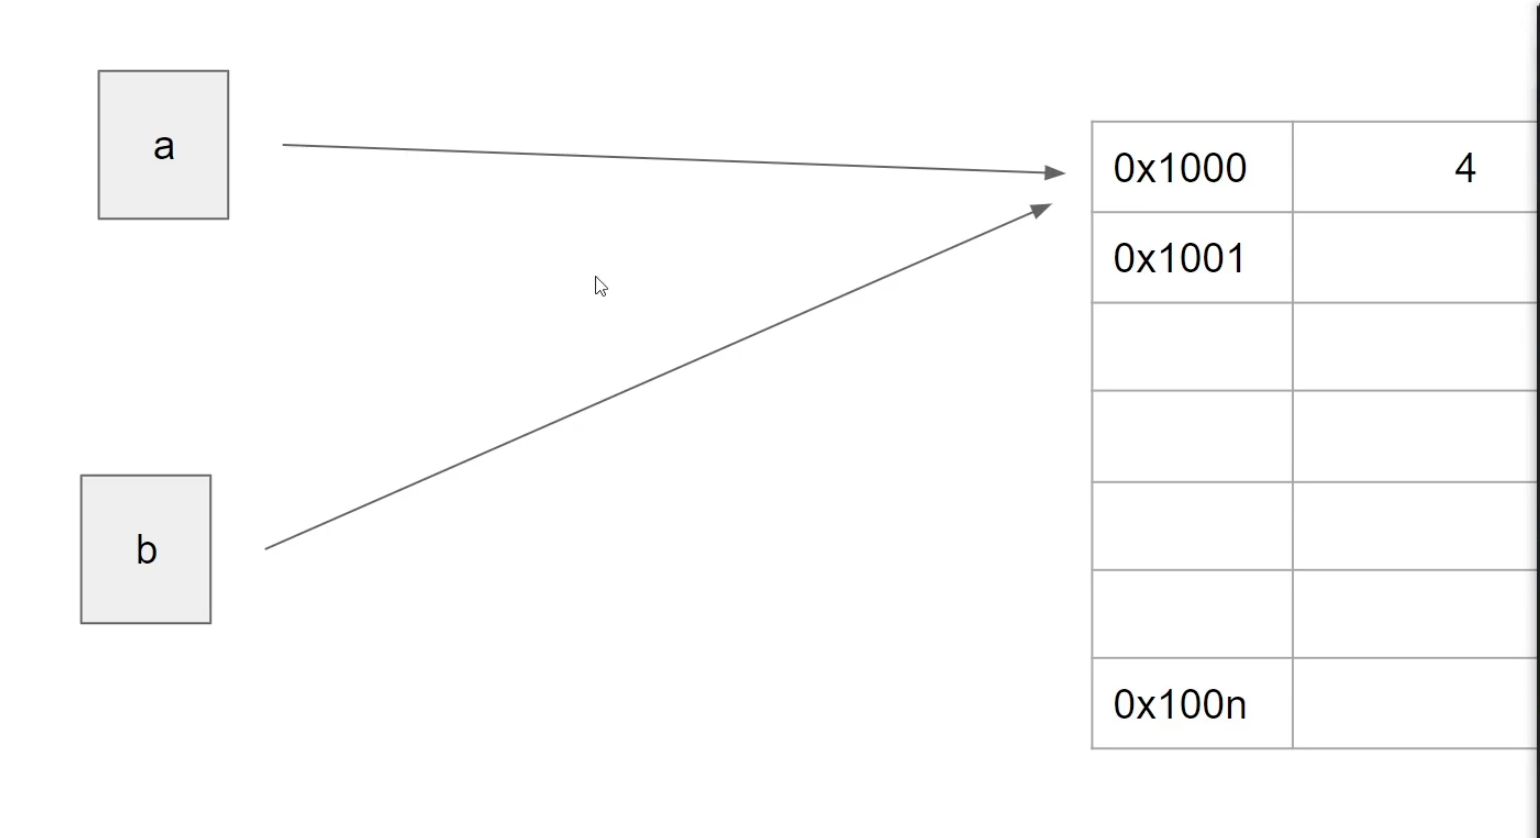

In [19]:
c=b

In [20]:
id(c)

4347387936

In [26]:
del a
print(b)

## when you delete a you don't delete 4 from the memory you just delete the reference 

5


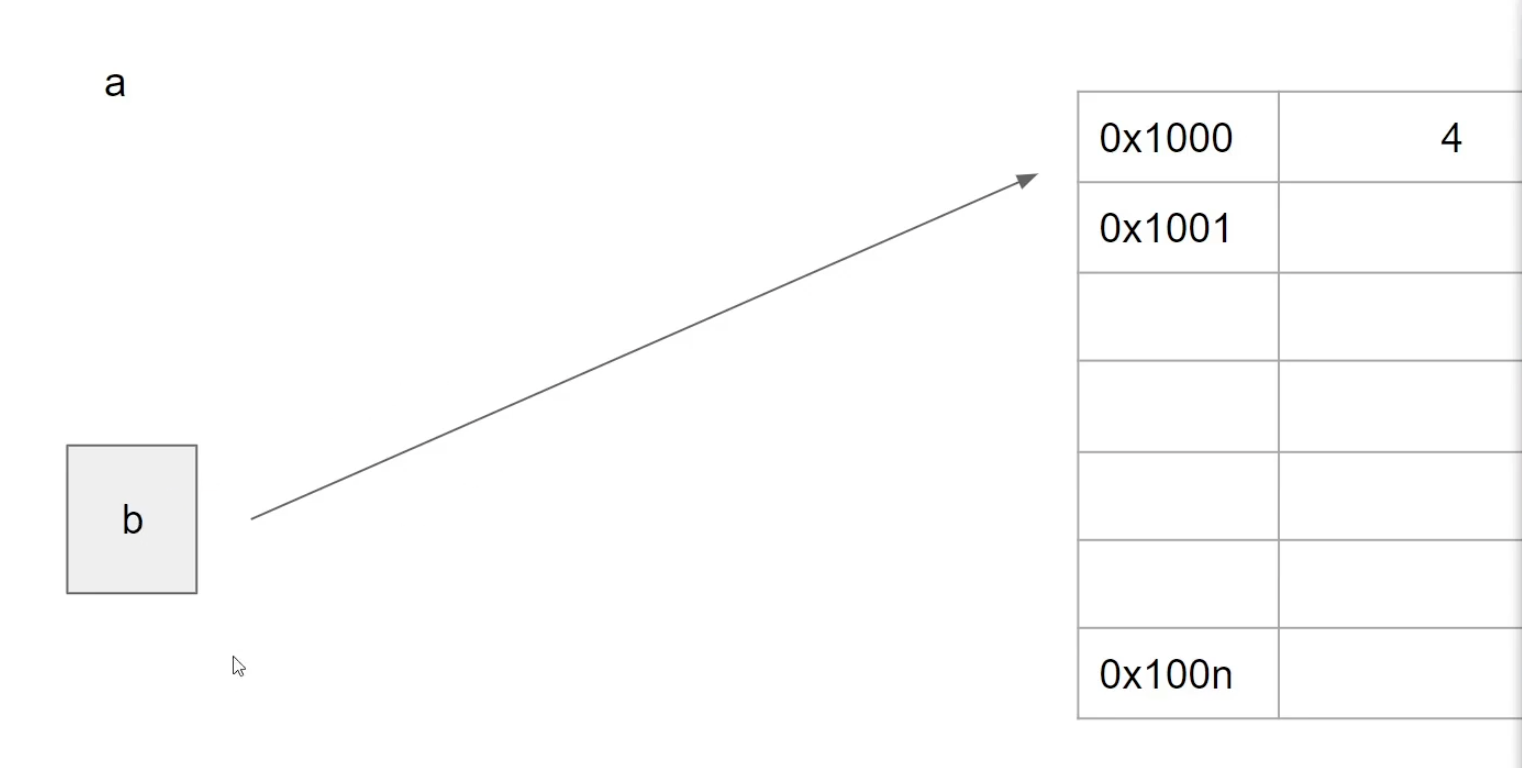

In [34]:
a=5
b=a
a=6
print(b) ## b will still be 5

5


## Reference counting:
Reference counting is the primary method python uses to manage memory. Each object in python maintains 
a count of references pointing to it.When the reference count drops to zero, the memory occupied by that object is deallocated.

In [30]:
## Reference counting

import sys ## related to system configuration
a=[] ## one reference from 'a' and one from getrefcount(a)
print(sys.getrefcount(a))



2


In [31]:
b=a
print(sys.getrefcount(a))

3


In [32]:
del b
print(sys.getrefcount(b))

NameError: name 'b' is not defined

In [33]:
print(sys.getrefcount(a))

2


## Garbage Collection

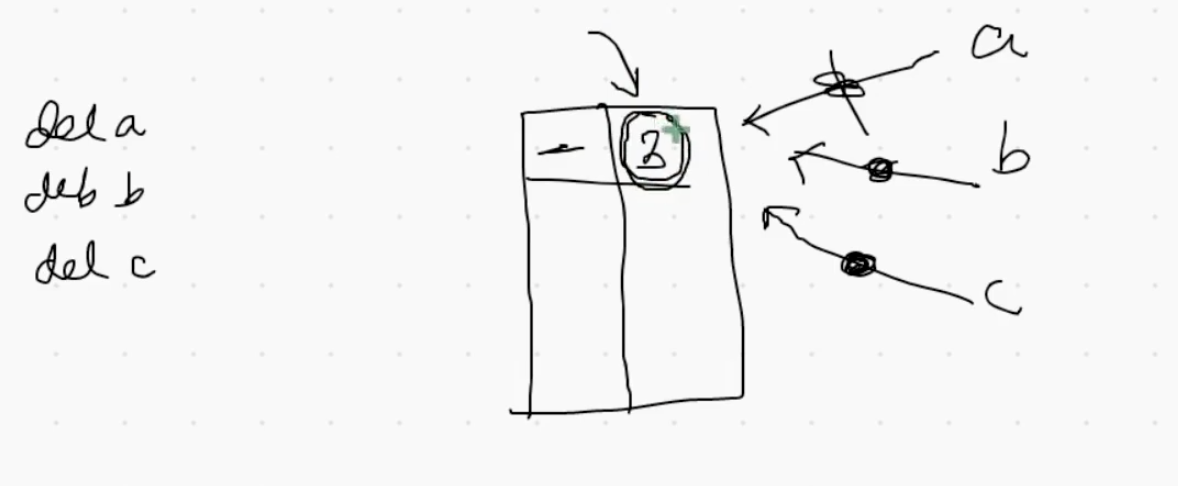

no one is pointing to 3 after deleting all the 3 variables 

but is 3 delted from memory ? No,also but no variable is using 3 now 

python doesn't provide the programmer the allowance to empty the memory unlike C and C++.In Python, internally a program runs called garbage collector ..This checks is there any thing which is stored in memory but no variable is pointing to it..if there is any value it will free up the memory




## Weird Stuff

In [37]:
## weird behaviour 1

a=5
b=a
c=b

sys.getrefcount(a) ## i am not getting 4 as an answer


## explanation: 2 is a very common no..system ke bhaut saree variables already using 2...
## 2 pahle se hi created tha bas ek aur variable aagaya point karne 

4294967295

In [49]:
a=4
b=4 
## this is not aliasing

print(id(a))
print(id(b))

a=5
b=5
print(id(a))
print(id(b))

## ids are always same 
## this behaviour is for nos between -5 to 256

4347387904
4347387904
4347387936
4347387936


In [50]:
a=-5
b=-5

print(id(a))
print(id(b))

## jaise hi -5 se kam ya jyada kar rahe ho ids are getting changed (true for no < -5)
## jaise hi 256 se jyada kar rahe ho ids are getting changed (true for no > 256)
a=-6
b=-6
print(id(a))
print(id(b))


4347387616
4347387616
4606835888
4606835696


In [51]:
a=256
b=256

print(id(a))
print(id(b))

## jaise hi -5 se kam ya jyada kar rahe ho ids are getting changed (this is true for any no)
a=258
b=258
print(id(a))
print(id(b))



4347395968
4347395968
4606835184
4606835856


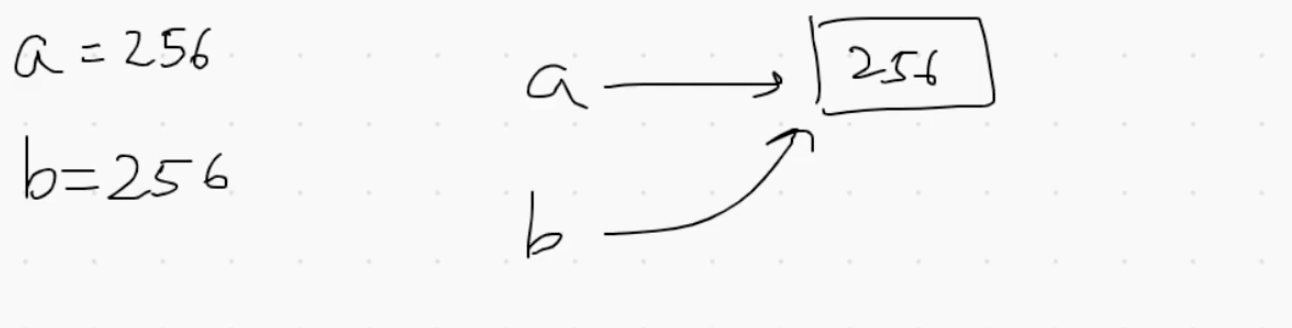

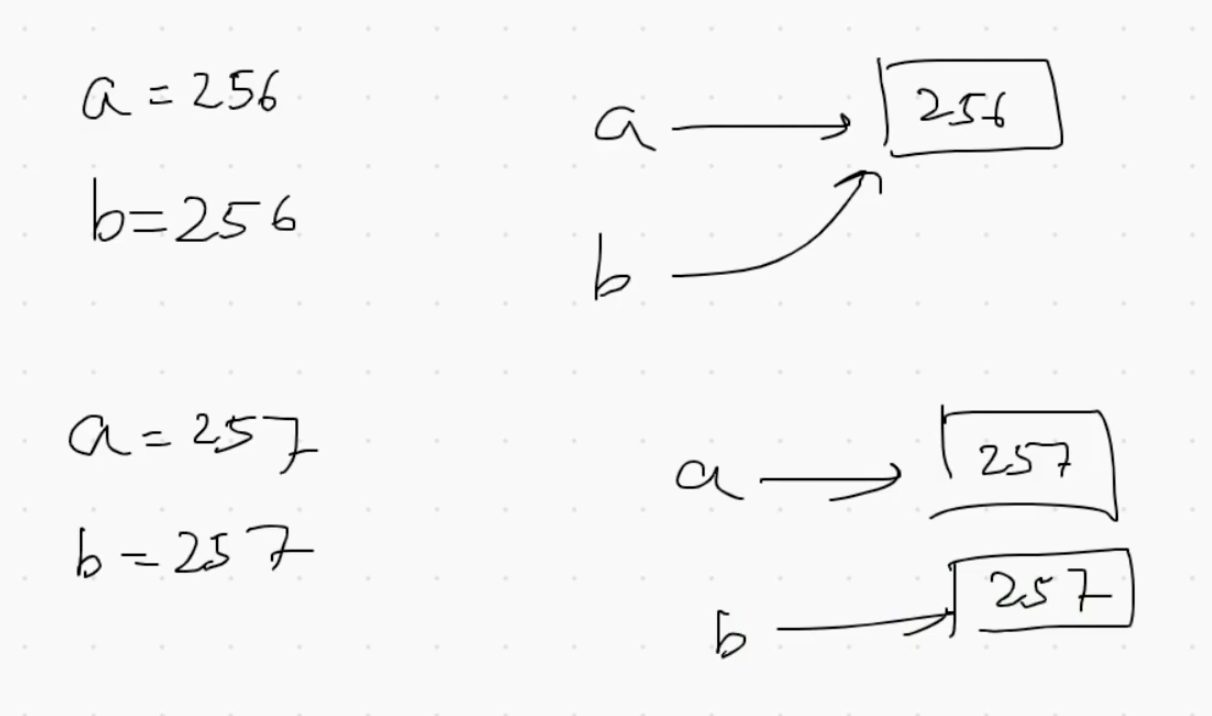



In [ ]:
## why it happens for <-5 and >256 ?

## this is software optimization 
## python thinks -5 to 256 are very common nos and it fills the memory automatically with those nos

## when you create a variable ex a=5 you are not creating 5, its already there in memory

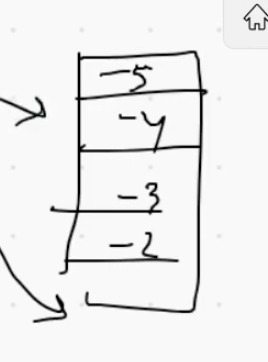

In [53]:
## weird behaviour 3

a='haldia'
b='haldia'
print(id(a))
print(id(b))

4569837808
4569837808


In [54]:
a='haldia institute of tech'
b='haldia institute of tech'
print(id(a))
print(id(b))
##ids are different 

4608504208
4608384560


In [56]:
a='haldia_inst_tech'
b='haldia_inst_tech' ## same ids
print(id(a),id(b))


## explanation: if the string is valid identifier (not starts with digit and have only letter,underscore and digits)
## then you are going to get same ids but if string isn't valid identifier then ids are going to be diff


4608096048 4608096048


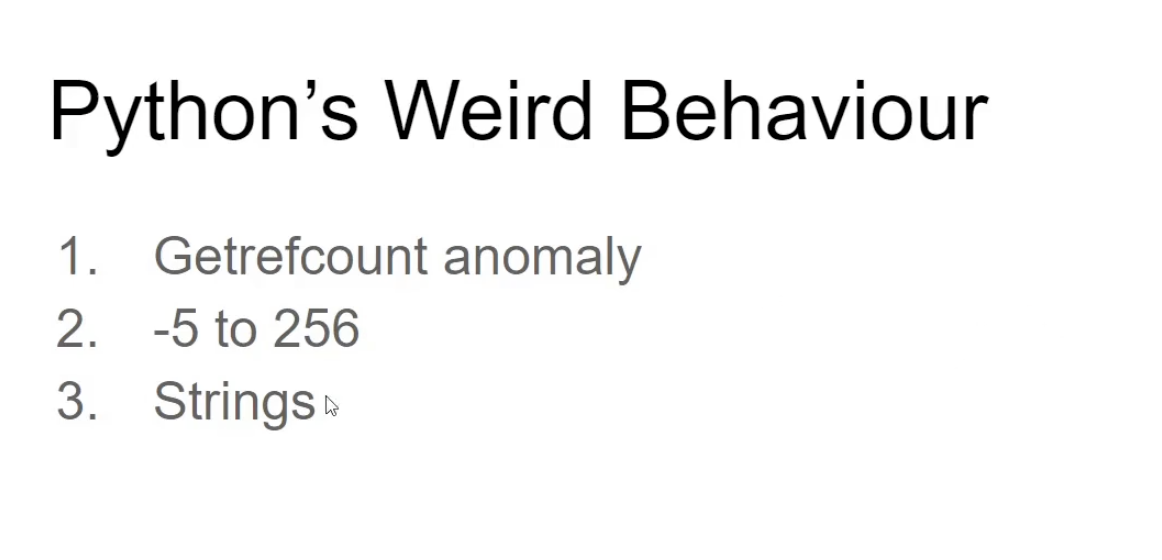

## List memory

In [57]:
L=[1,2,3]
id(L) ## 6624 is id of first element of list 

4608626624

In [60]:
print(id(1))
print(id(L[0]))

4347387808
4347387808


In [65]:
print(id(2))
print(id(L[1]))

4347387840
4347387840


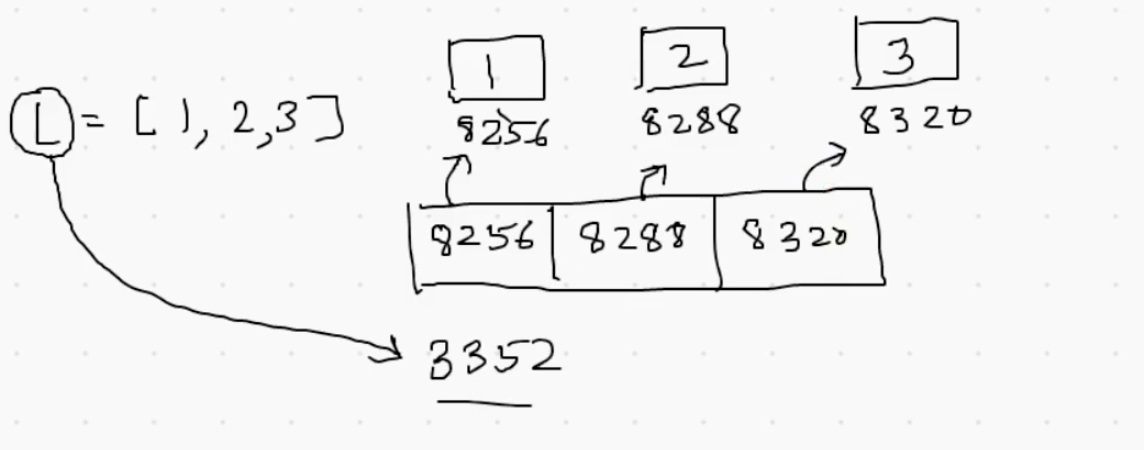

In [64]:
L[2]=1
L

[1, 2, 1]

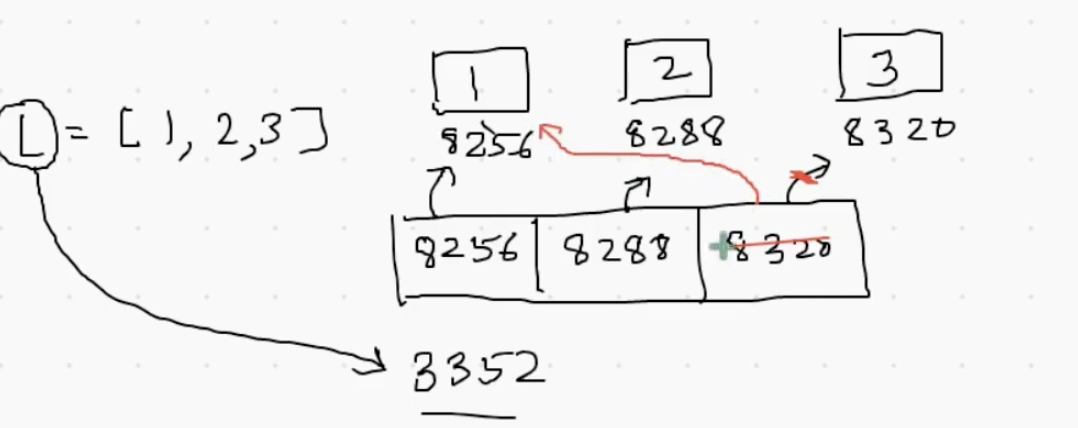

In [67]:
print(id(L[2]))
print(id(L[0]))


4347387808
4347387808


In [68]:
L=[1,2,3,[4,5]]

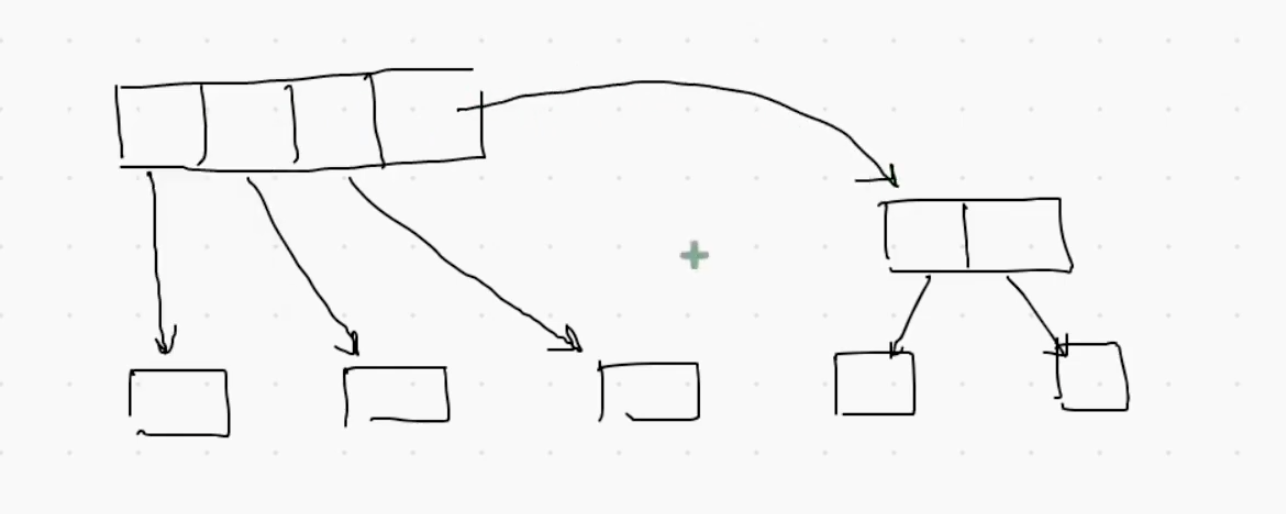

## Mutability

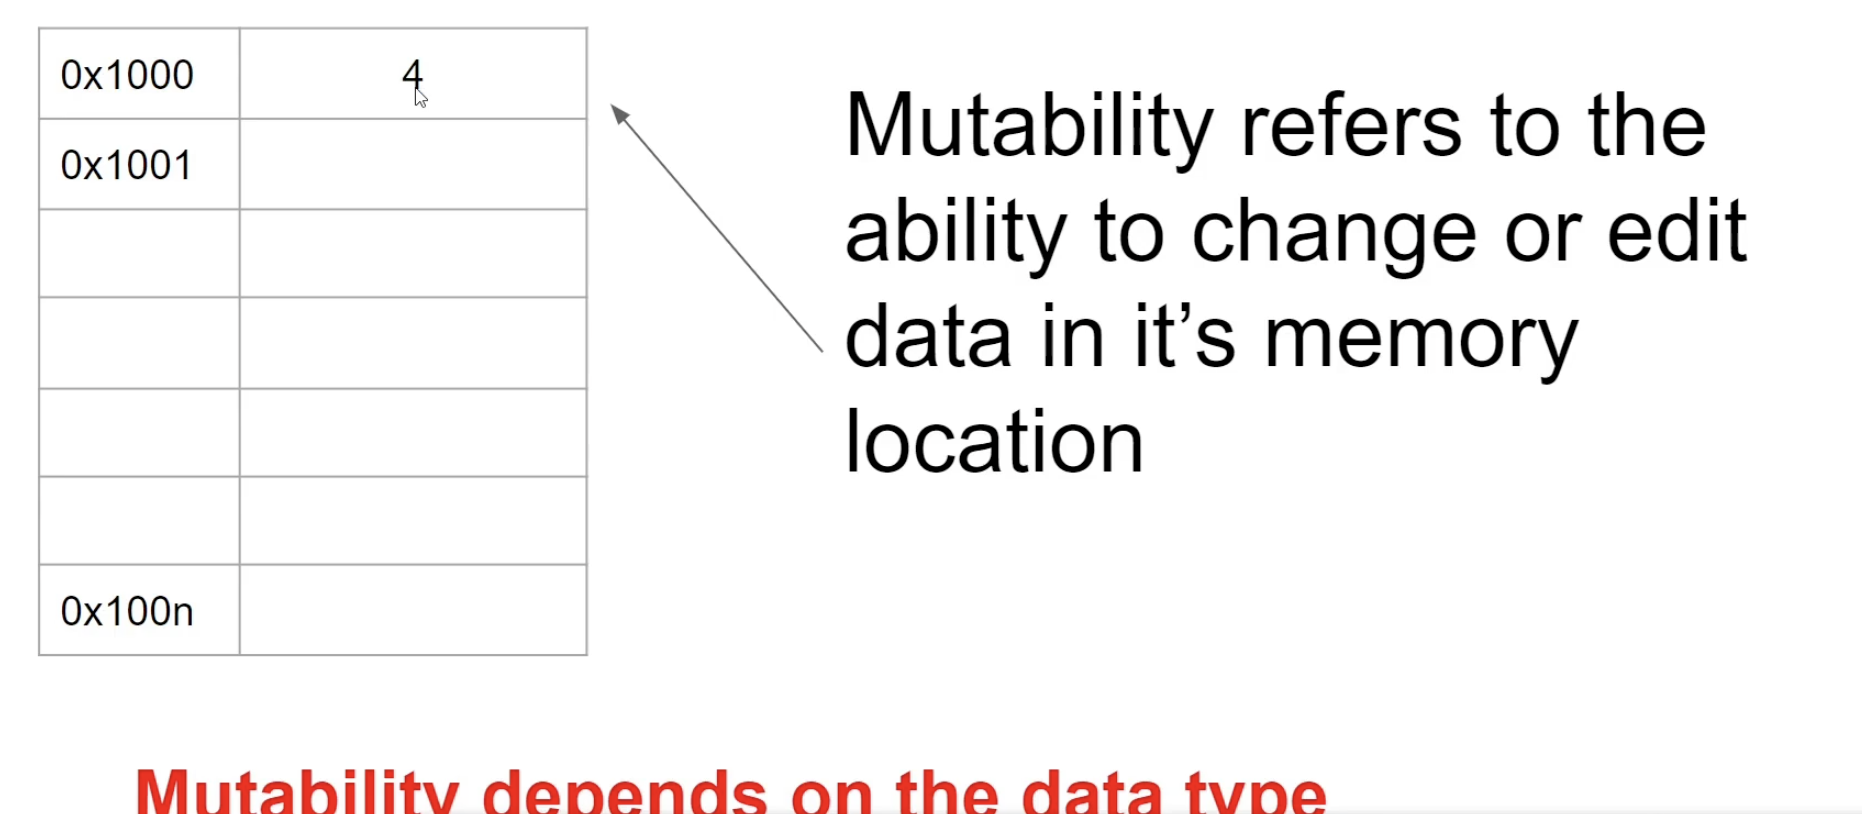

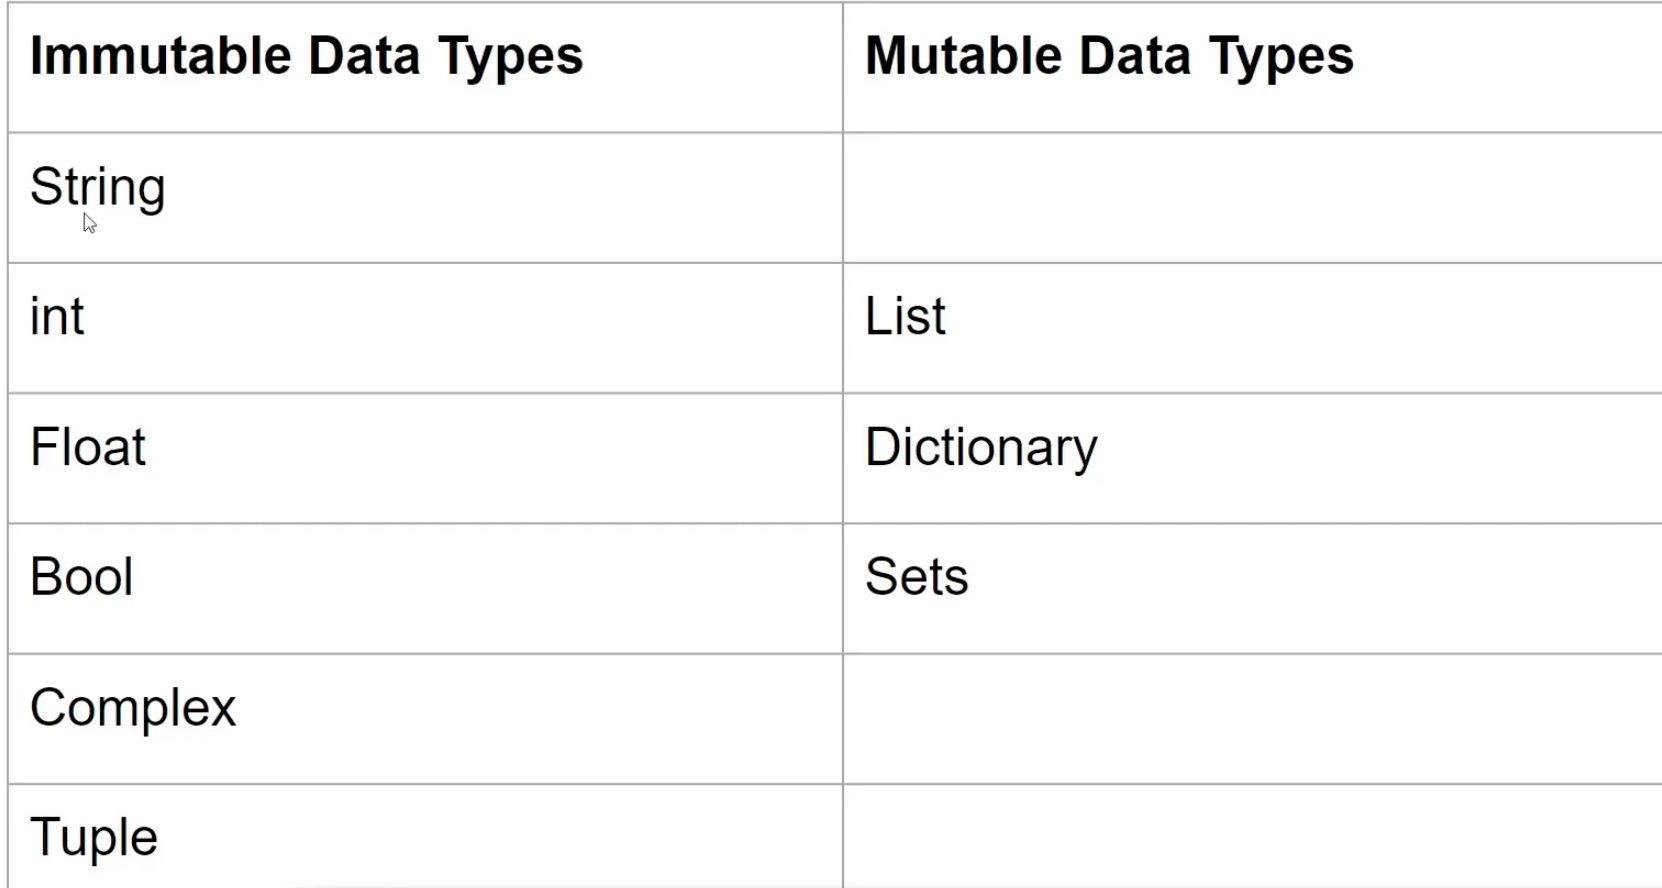

if you want to change int, you need to change the address whereas list,dict can be changed inplace and don't need to change the address 

In [69]:
a='Hello'
print(id(a))
a=a+' World'
print(id(a))
## Address has changed 

4569917472
4608903088


In [70]:
t=(1,2,3)
print(id(t))
t=t+(5,6)
print(id(t))

4608618880
4608131616


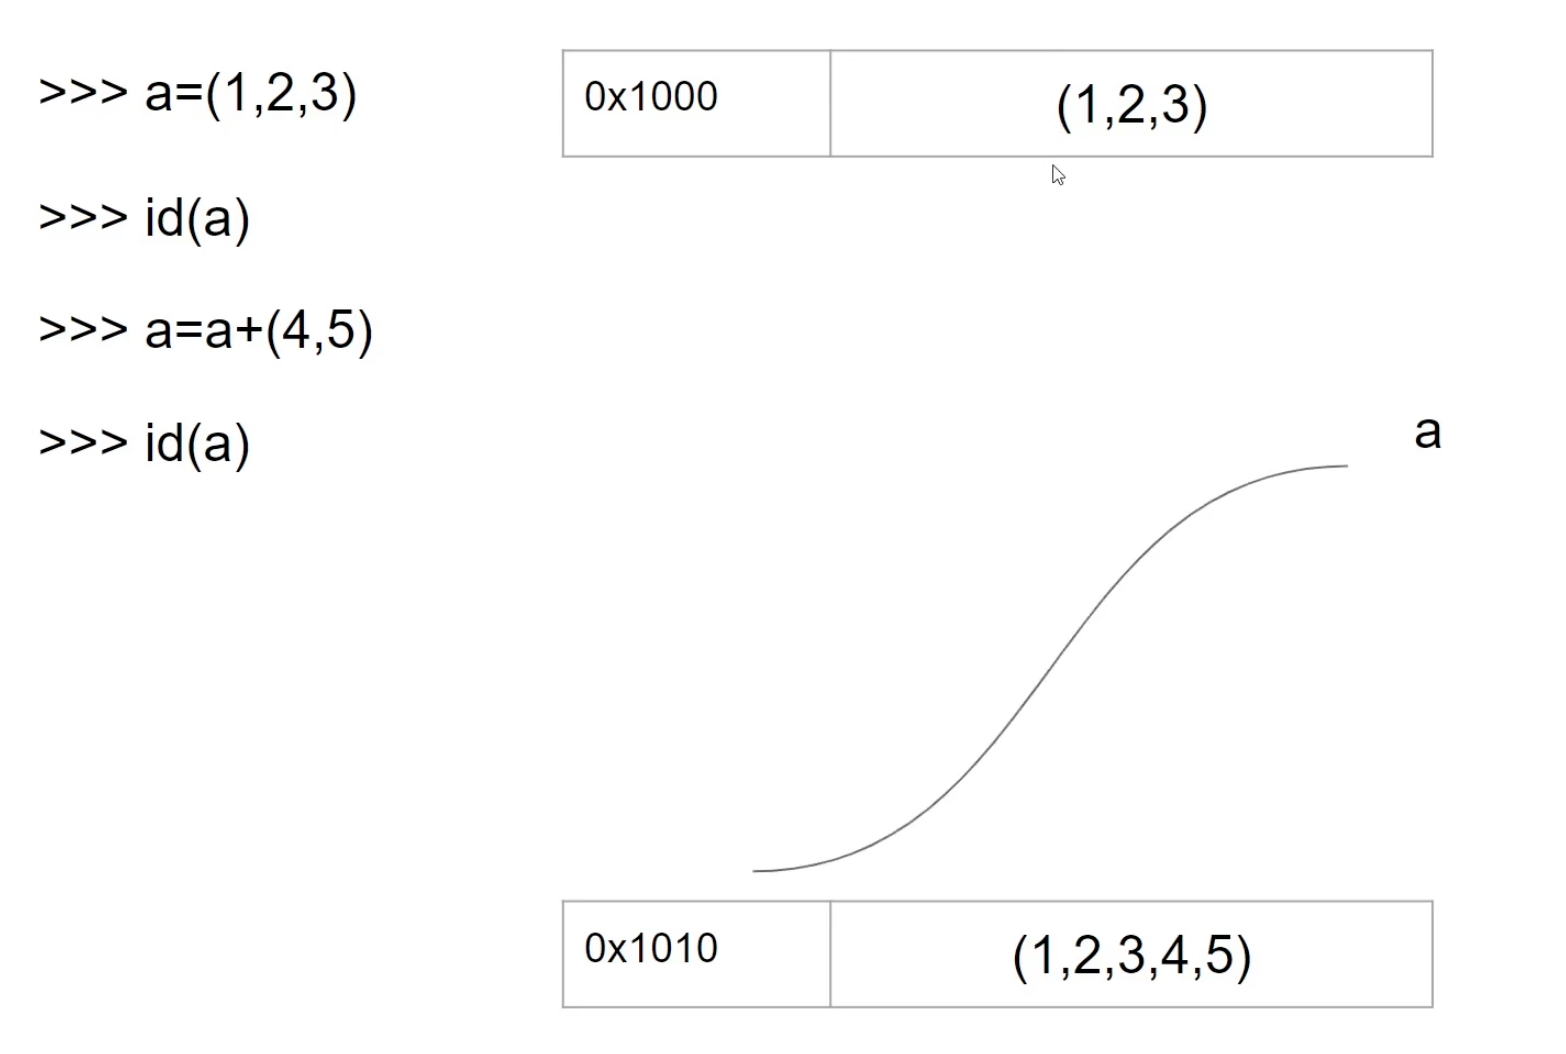

In [71]:
## mutable datatype

L=[1,2,3]
print(id(L))
L.append(4)
print(id(L))

4607651840
4607651840


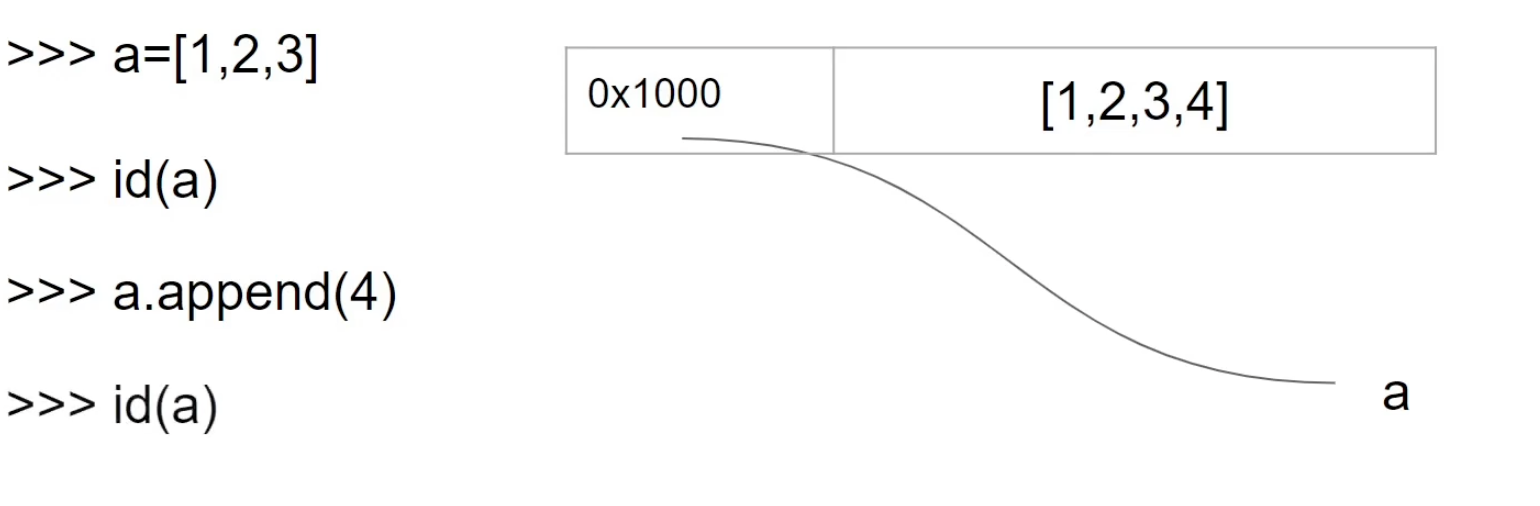

In [74]:
## Side effects of mutability:

L=[1,2,3]
L1=L
print(id(L),id(L1))

L1.append(4)
print(id(L),id(L1))
print(L)

## keval L1 mein changes hi nahi hue L mein bhi hue hai

4608754304 4608754304
4608754304 4608754304
[1, 2, 3, 4]


## Cloning

In [76]:
## solution: cloning 
## dont do L=L1
## soln
L1=L[:]
print(id(L),id(L1))
L1.append(4)
print(L,L1)

4608754304 4609055296
[1, 2, 3, 4] [1, 2, 3, 4, 4]


In [77]:
a=(1,2,3,[4,5])

a[-1][-1]=500
a

(1, 2, 3, [4, 500])

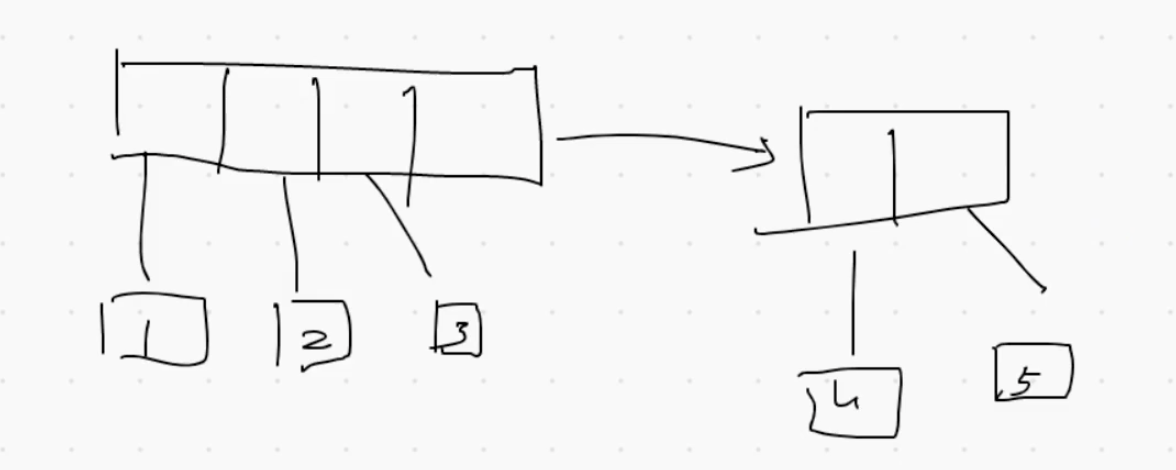

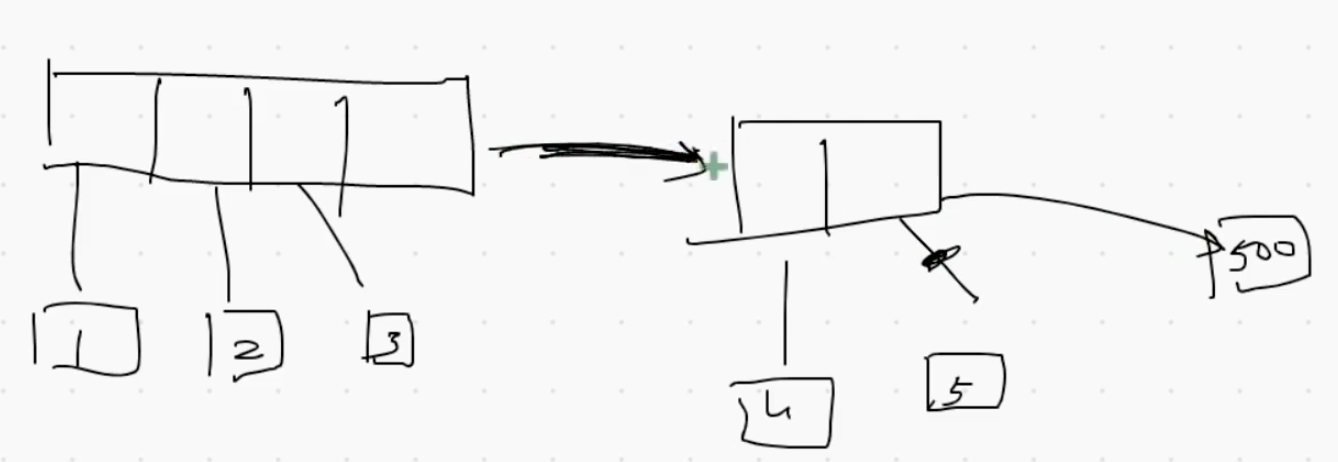
first arrow toh abhi bhi wahi hai 

In [78]:
a=[1,2,3,(4,5)]
a[-1][-1]=500

TypeError: 'tuple' object does not support item assignment

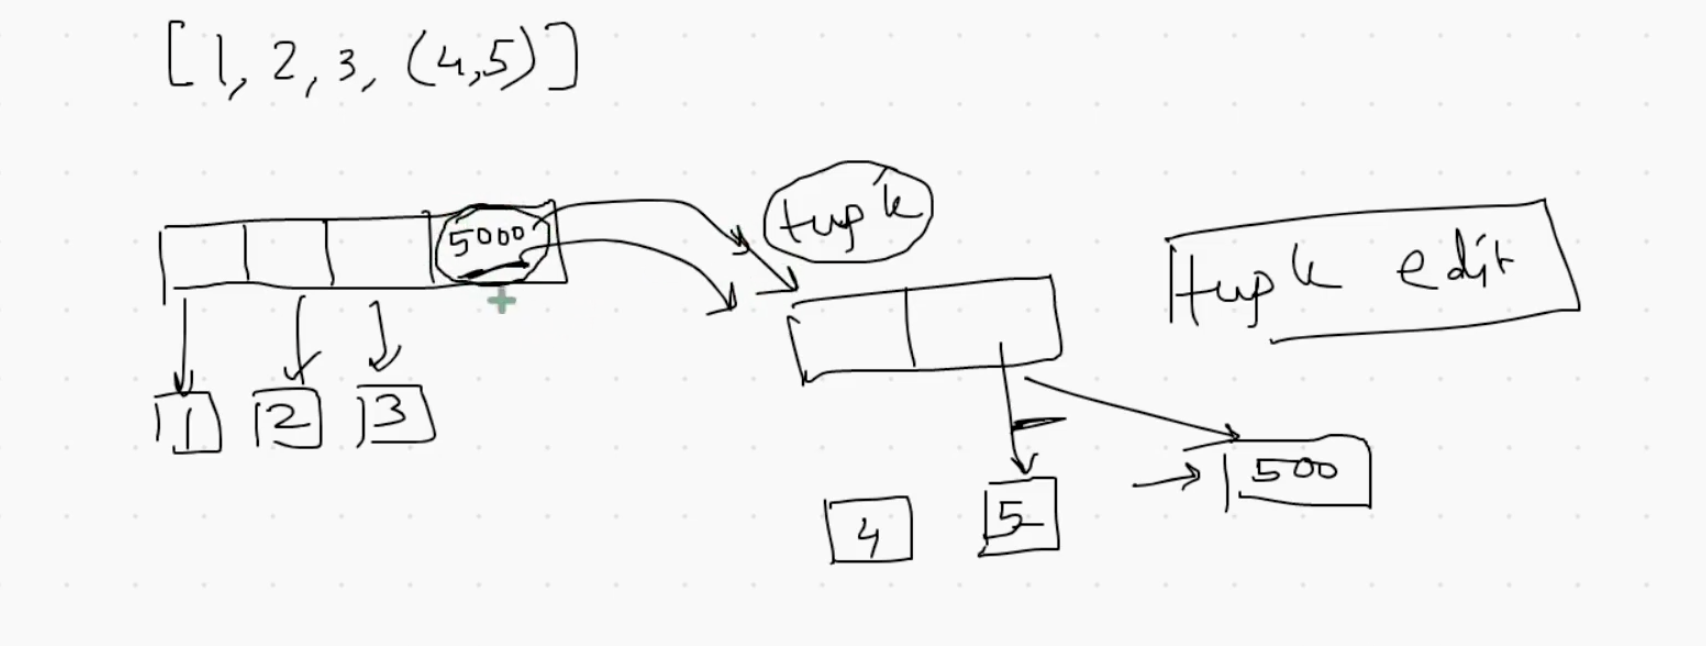

In [81]:
a=[1,2]
b=[3,4]
c=(a,b)
print(id(a),id(b),id(c))

c[0][0]=100
c



4609195776 4609736960 4609729472


([100, 2], [3, 4])

In [82]:
print(id(a))
print(id(c))

4609195776
4609729472


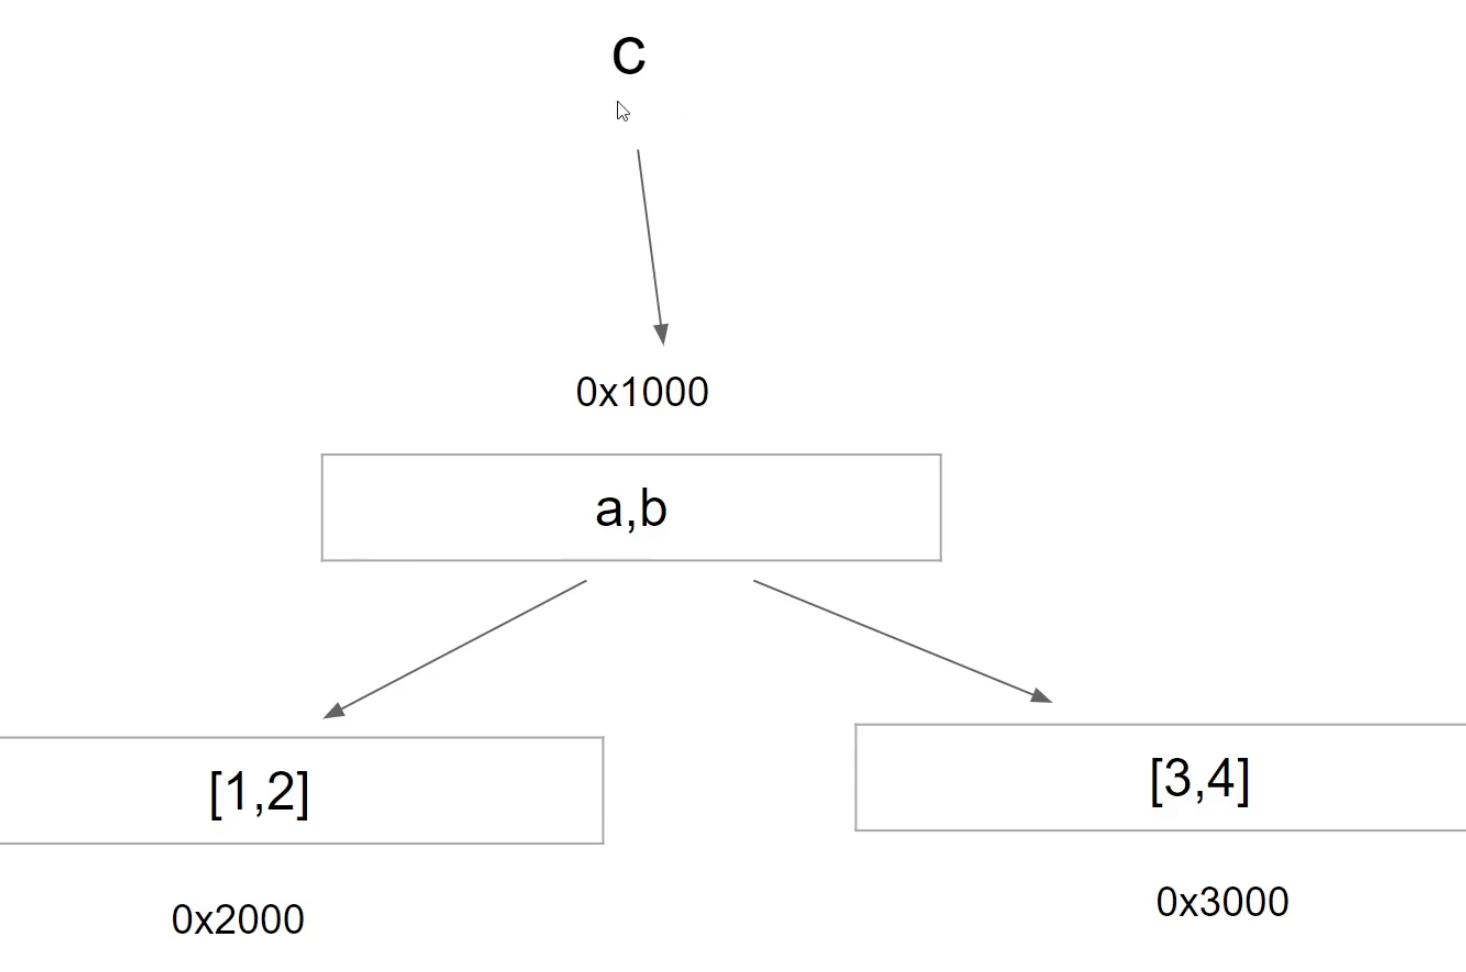

In [83]:
## on concatenation address changes
L=[1,2,3]
print(id(L))
L=L+[4,5]
print(id(L))

4606923200
4608754304


In [84]:
a=a+[5,6]
c

([100, 2], [3, 4])

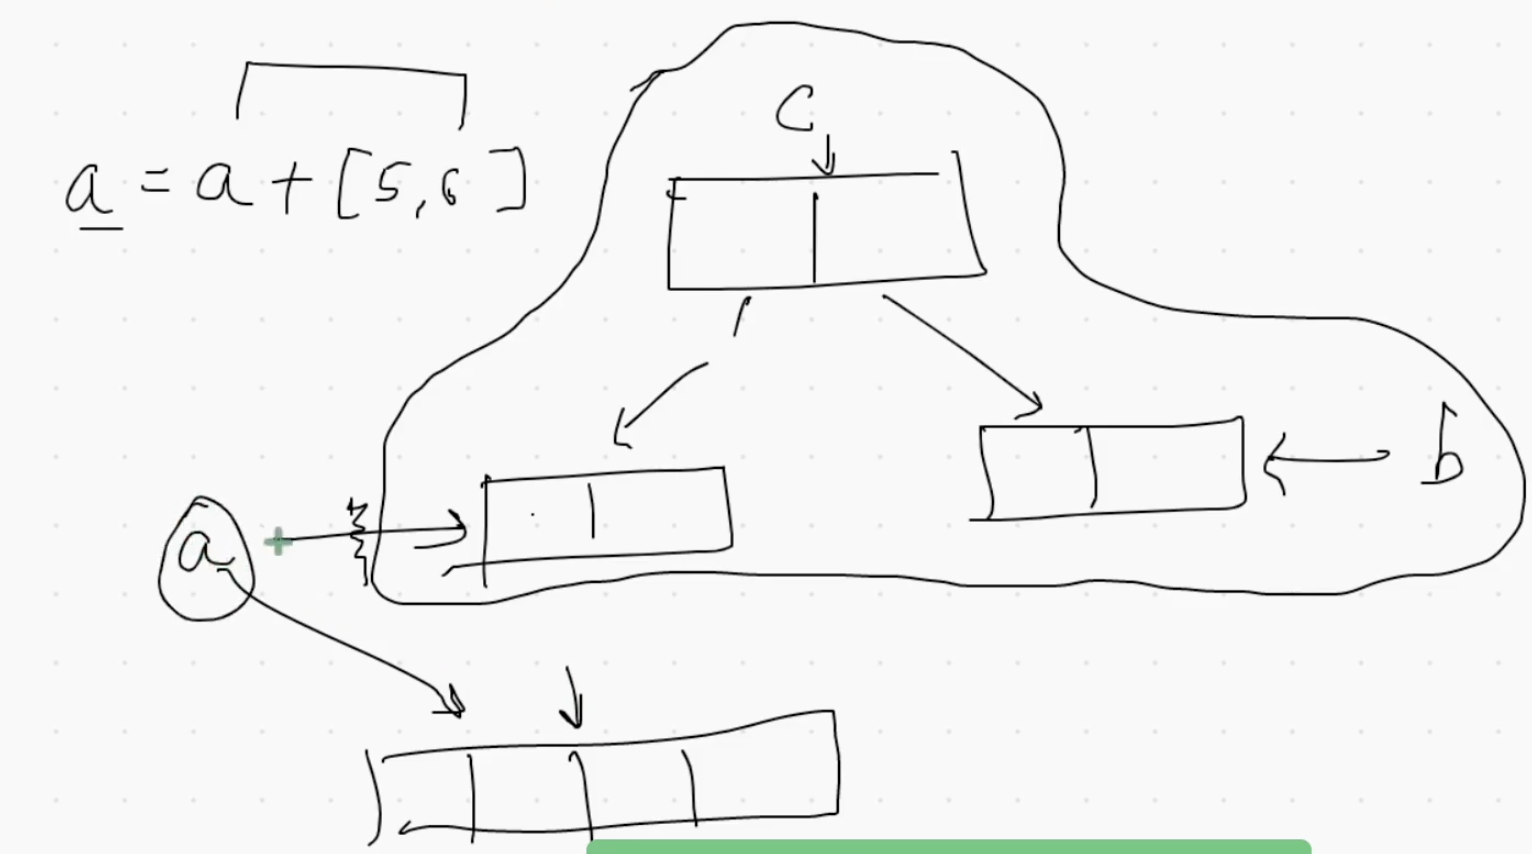

In [86]:
## gc module (garbage collection)

import gc 
## enable garbage collection
gc.enable()

In [87]:
## to disable garbage collection use gc.disable()

In [91]:
## to manually trigger garbage collection

gc.collect() ## these many values are present in the memory 

0

In [92]:
## Get garbage collection stats
print(gc.get_stats())

[{'collections': 80, 'collected': 20546, 'uncollectable': 0}, {'collections': 7, 'collected': 208, 'uncollectable': 0}, {'collections': 5, 'collected': 2433, 'uncollectable': 0}]


In [94]:
## get unreachable objects
print(gc.garbage)

[]
